**Empezamos cargando algunas herramientas para cargar los datos y manipularlos.**

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
import itertools
import warnings

warnings.filterwarnings("ignore")
import io

**Para visualización usaremos principalmente plotly, también seaborn y matplotlib.**

In [2]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls  # visualization
import plotly.figure_factory as ff  # visualization
import seaborn as sns

In [3]:
df = pd.read_csv("female_players.csv")
df.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

El dataset tiene 181361 jugadoras, pero nosotros queremos solamente las del 2023

In [4]:
len(df)

181361

Si filtramos las jugadoras que no son del 2023 nos quedamos con 7425 filas.

In [5]:
df_23 = df[df["fifa_version"] == 23]
print(len(df_23))
df_23

7425


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

In [6]:
df_23.head(5)

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

In [7]:
column_names = df_23.columns.tolist()
print(column_names)

['player_id', 'player_url', 'fifa_version', 'fifa_update', 'fifa_update_date', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined_date', 'club_contract_valid_until_year', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_sp

**Significado de las columnas \

    'player_id', 
    'player_url', 
    'fifa_version', 
    'fifa_update', 
    'fifa_update_date', 
    'short_name', 
    'long_name', 
    'player_positions',  
    'overall'   = General performance quality and value of the player representing 
                  the key positional skills and international reputation rated between 1-99., 
    'Potential' = Maximum Overall rating expected to be reached by a player in the top of 
                  his career rated between 1-99, 
    'value_eur' = Valor dentro del juego,
    'wage_eur'  = Sueldo,
    'age',
    'dob'       = date of birth,
    'height_cm',
    'weight_kg',
    'league_id',
    'league_name',
    'league_level', 
    'club_team_id',
    'club_name',
    'club_position',
    'club_jersey_number',
    'club_loaned_from', 
    'club_joined_date', 
    'club_contract_valid_until_year',
    'nationality_id',
    'nationality_name',
    'nation_team_id',
    'nation_position',
    'nation_jersey_number', 
    'preferred_foot' = Right or Left. Label encoder is applied as 0 for left and 1 for right.,
    'weak_foot',  = Represents how well a player uses his weak foot (e.g. left for righties) rated between 1 to 5.
    'skill_moves' = 1-5 estrellas, 1 significa que puede realizar las habilidades basicas de 1 estrella, 5 significa que puede
                    realizar todas las habilidades de 1 a 5 estrellas,
    'international_reputation',
    'work_rate'  = Degree of the effort the player puts in terms of attack and defense rated as low, medium and high. This                          feature is divided into two new features as AttackWorkRate and DefenseWorkRate. Besides, label encoder is                        applied as 0 for low, 0.5 for medium and 1 for high., 
    'body_type',
    'real_face',
    'release_clause_eur', 
    'player_tags',  
    'player_traits',
    'pace'          = Pace is a combination of two different stats in FIFA: sprint speed and acceleration.,
    'shooting'  = combinacion de todos los disparos va de 1 a 99,
    'passing'   = combinacion de todos los pases va de 1 a 99,
    'dribbling' = combinacion de atributos de dribble 1-99,
    'defending' = combinacion de atributos defensivos 1-99,
    'physic' = Physical strength of the player rated between 1-99,
    'attacking_crossing', 
    'attacking_finishing' = Finishing skill of the player rated between 1-99. 
                            Finishing in football refers to finish an attack by scoring a goal.,
    'attacking_heading_accuracy' = Player’s accuracy to pass or shoot by using his head rated between 1-99.,
    'attacking_short_passing' = Player’s accuracy for short passes rated between 1-99., 
    'attacking_volleys',
    'skill_dribbling',
    'skill_curve' = habilidad de un jugador para curvar la pelota ya sea pasandola y disparandole al arco,
    'skill_fk_accuracy'= Habilidad para patear tiros libres,
    'skill_long_passing' = Player’s accuracy for long passes rated between 1-99,
    'skill_ball_control',
    'movement_acceleration',
    'movement_sprint_speed',
    'movement_agility',
    'movement_reactions',
    'movement_balance',
    'power_shot_power', 
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots', 
    'mentality_aggression',
    'mentality_interceptions',
    'mentality_positioning',
    'mentality_vision',
    'mentality_penalties',
    'mentality_composure',
    'defending_marking_awareness',
    'defending_standing_tackle',
    'defending_sliding_tackle',
    'goalkeeping_diving',
    'goalkeeping_handling',
    'goalkeeping_kicking',
    'goalkeeping_positioning',
    'goalkeeping_reflexes',
    'goalkeeping_speed',
    'ls' = (lef striker) Positional skill. Player’s general ability when playing in in LS position rated between 1-99. ,
    'st' = (striker) Positional skill. Player’s general ability when playing in ST position rated between 1-99., 
    'rs' = (right striker) Positional skill. Player’s general ability when playing in in RS position rated between 1-99.,
    'lw' = (lef winger) '',
    'lf' = (lef forward)'',
    'cf' = (center forward)'',
    'rf' = (right forward)'',
    'rw' = (right wing)'', 
    'lam'= (Left attacking midfield)'',
    'cam'= (Central Attacking Midfielder)'',
    'ram'= (Right attacking midfield), 
    'lm' = (Left Midfielder), 
    'lcm'= (Left Central Midfielder),
    'cm' = (Central Midfielder),
    'rcm'= (right Central Midfielder),
    'rm' = (Right Midfielder),
    'lwb'= (Left Wing Back),
    'ldm'= (Left defensive midfielder),
    'cdm'= (Central Defensive Midfielder),
    'rdm'= (Left Defensive Midfielder), 
    'rwb'= (Right Wing Back),
    'lb' = (Left Back), 
    'lcb'= (Left Center Back),
    'cb' = (Center Back),
    'rcb'= (Right Center Back), 
    'rb' = (right back),
    'gk' = (goalkeeper),
    'player_face_url'

In [8]:
column_info = []

for col in df_23.columns:
    col_data = {
        "Column": col,
        "Data Type": df_23[col].dtype,
        "Missing Values": df_23[col].isnull().sum(),
        "Unique Values": df_23[col].nunique(),
    }

    column_info.append(col_data)

column_info_df = pd.DataFrame(column_info)
print(column_info_df)

                             Column Data Type  Missing Values  Unique Values
0                         player_id     int64               0            899
1                        player_url    object               0           7425
2                      fifa_version     int64               0              1
3                       fifa_update     int64               0              9
4                  fifa_update_date    object               0              9
5                        short_name    object               0            903
6                         long_name    object               0            904
7                  player_positions    object               0            200
8                           overall     int64               0             36
9                         potential     int64               0             32
10                        value_eur   float64            2640            199
11                         wage_eur   float64            2640             14

In [9]:
print(df_23.describe())

           player_id  fifa_version  fifa_update      overall    potential  \
count    7425.000000        7425.0  7425.000000  7425.000000  7425.000000   
mean   255012.481347          23.0     5.013468    75.160135    79.635286   
std     15229.355039           0.0     2.581606     6.385309     5.630677   
min    226177.000000          23.0     1.000000    57.000000    63.000000   
25%    245178.000000          23.0     3.000000    71.000000    76.000000   
50%    264875.000000          23.0     5.000000    75.000000    79.000000   
75%    265947.000000          23.0     7.000000    80.000000    83.000000   
max    273050.000000          23.0     9.000000    92.000000    94.000000   

          value_eur     wage_eur          age    height_cm    weight_kg  \
count  4.785000e+03  4785.000000  7425.000000  7425.000000  7425.000000   
mean   1.679851e+07   817.920585    25.574141   168.862088    60.993535   
std    2.433825e+07   468.965989     4.474566     6.128504     5.305582   
min   

## 2.-Preparación-de-los-datos-a analizar

In [23]:
#3n=10000 #cantidad de jugadores a considerar

df_n=df_23.copy() #se reduce la base a los n primeros jugadores

#df_n=df_n[(df_n['overall']>70)]

skills_ratings = ['physic','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                  'movement_reactions','movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
                  'power_strength', 'power_long_shots','mentality_aggression', 'mentality_interceptions',
                  'mentality_positioning','mentality_vision', 'mentality_penalties','mentality_composure',
                  'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving','goalkeeping_handling','goalkeeping_kicking', 
                  'goalkeeping_positioning', 'goalkeeping_reflexes']  #,'goalkeeping_speed']

print(len(skills_ratings), 'variables numéricas de desempeño según habilidad')

35 variables numéricas de desempeño según habilidad


**Se crea el jugador perfecto para ver a donde se ubica en nuestra visualización**

In [24]:
MachineGunDict={'long_name':'MachineGun','overall':99}
for skills in skills_ratings:
    MachineGunDict[skills]=99

df_n=df_n.append(MachineGunDict,ignore_index=True)

In [25]:
JugadorPromedioDict={'long_name':'JugadorPromedio','overall':df_n.overall.mean()}
for skills in skills_ratings:
    JugadorPromedioDict[skills]=df_n[skills].mean()

df_n=df_n.append(JugadorPromedioDict,ignore_index=True)

In [26]:
df_skills=df_n[skills_ratings] #base, sólo con desempeños según habilidad (numéricas)

In [27]:
df_skills.head(5)

,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,83.0,70.0,93.0,91.0,78.0,92.0,90.0,76.0,68.0,64.0,92.0,89.0,85.0,90.0,91.0,82.0,91.0,91.0,87.0,86.0,89.0,70.0,24.0,95.0,79.0,75.0,92.0,44.0,39.0,30.0,7.0,12.0,8.0,16.0,13.0
1,87.0,51.0,70.0,96.0,84.0,55.0,72.0,65.0,58.0,87.0,85.0,65.0,62.0,53.0,90.0,34.0,85.0,86.0,75.0,93.0,65.0,88.0,90.0,70.0,59.0,75.0,84.0,93.0,94.0,91.0,7.0,14.0,17.0,11.0,15.0
2,77.0,71.0,95.0,86.0,91.0,87.0,88.0,68.0,70.0,82.0,93.0,88.0,89.0,83.0,84.0,67.0,90.0,81.0,87.0,81.0,83.0,53.0,46.0,92.0,75.0,88.0,92.0,41.0,43.0,39.0,11.0,11.0,10.0,10.0,11.0
3,77.0,71.0,94.0,93.0,84.0,90.0,87.0,79.0,75.0,72.0,91.0,81.0,85.0,74.0,92.0,47.0,86.0,89.0,75.0,81.0,89.0,65.0,23.0,96.0,76.0,86.0,86.0,42.0,33.0,30.0,15.0,7.0,12.0,10.0,14.0
4,89.0,87.0,73.0,82.0,85.0,66.0,83.0,88.0,81.0,80.0,85.0,85.0,85.0,86.0,89.0,82.0,85.0,92.0,90.0,90.0,86.0,82.0,85.0,73.0,73.0,62.0,86.0,89.0,91.0,89.0,10.0,14.0,16.0,8.0,15.0


## 3.-Exploratorio-Visual-para-Clustering

In [28]:
skills_ratings

['physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_reactions',
 'movement_balance',
 'power_shot_power',
 'power_jumping',
 'power_stamina',
 'power_strength',
 'power_long_shots',
 'mentality_aggression',
 'mentality_interceptions',
 'mentality_positioning',
 'mentality_vision',
 'mentality_penalties',
 'mentality_composure',
 'defending_marking_awareness',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

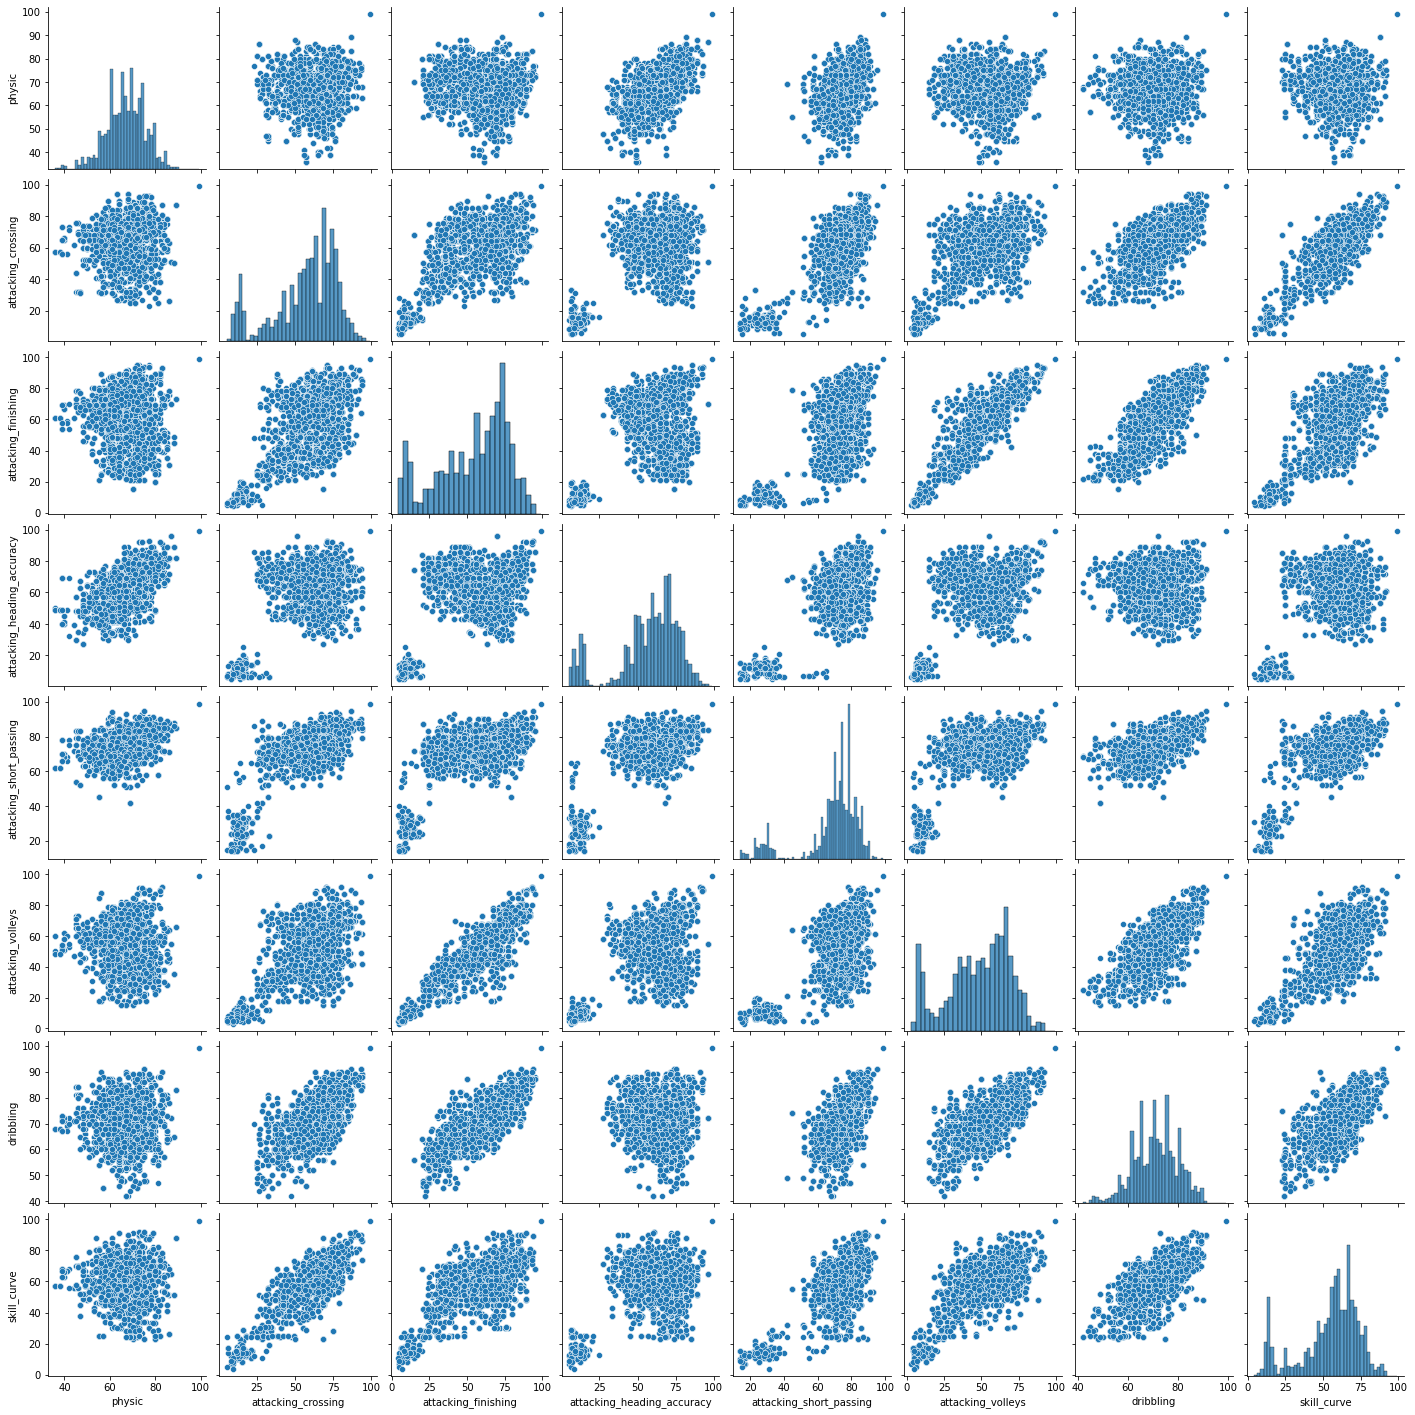

In [34]:
sns.pairplot(df_skills[skills_ratings[0:8]])

In [30]:
#data=[]
bool_crack=df_n["overall"] > 85 #diferenciamos a los mejores jugadores

#Elegimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5] #5,  2 ..
skill_2=skills_ratings[15]  #15, 29, 4 ..

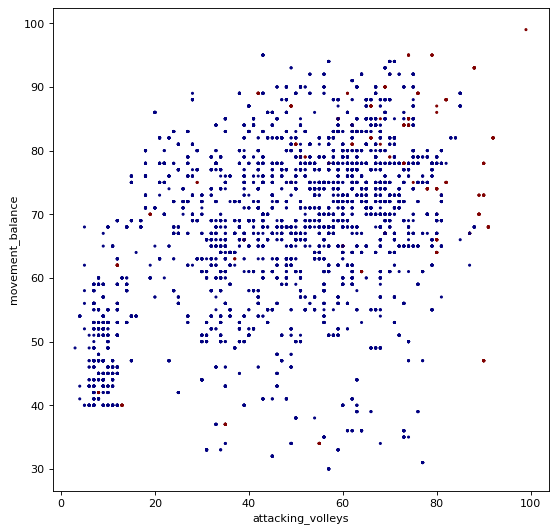

In [31]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills[skill_1], y=df_skills[skill_2],s=3,c=bool_crack,cmap='jet')
plt.xlabel(skill_1)
plt.ylabel(skill_2)
plt.show()

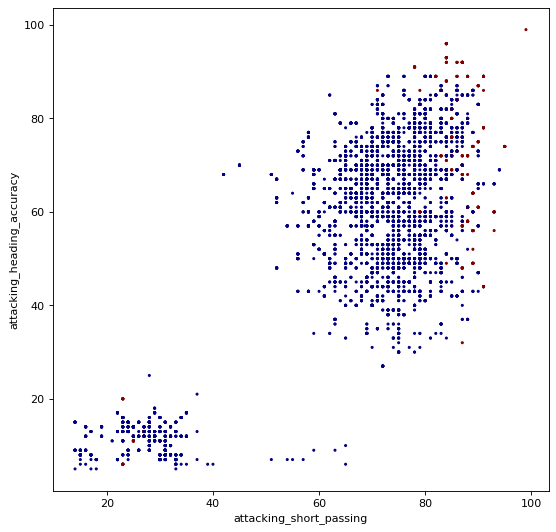

In [33]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['attacking_short_passing'], y=df_skills['attacking_heading_accuracy'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('attacking_short_passing')
plt.ylabel('attacking_heading_accuracy')
plt.show()

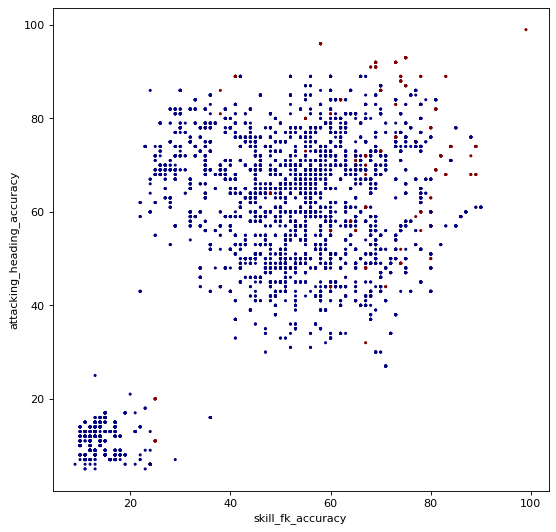

In [35]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['skill_fk_accuracy'], y=df_skills['attacking_heading_accuracy'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('skill_fk_accuracy')
plt.ylabel('attacking_heading_accuracy')
plt.show()

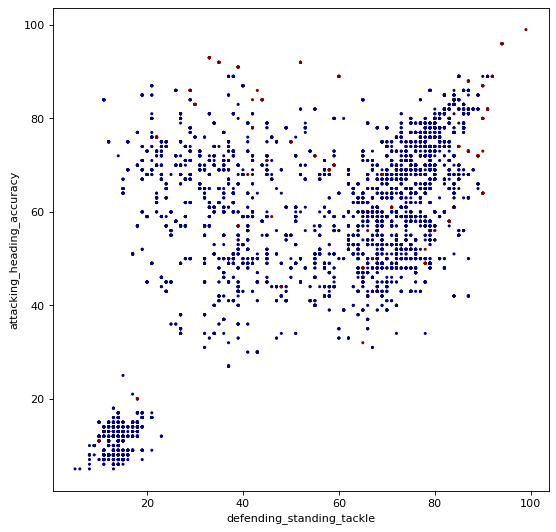

In [36]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['attacking_heading_accuracy'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('attacking_heading_accuracy')
plt.show()

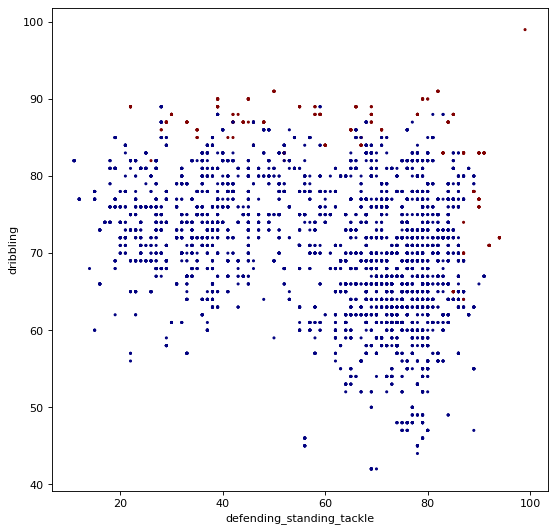

In [37]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['dribbling'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('dribbling')
plt.show()

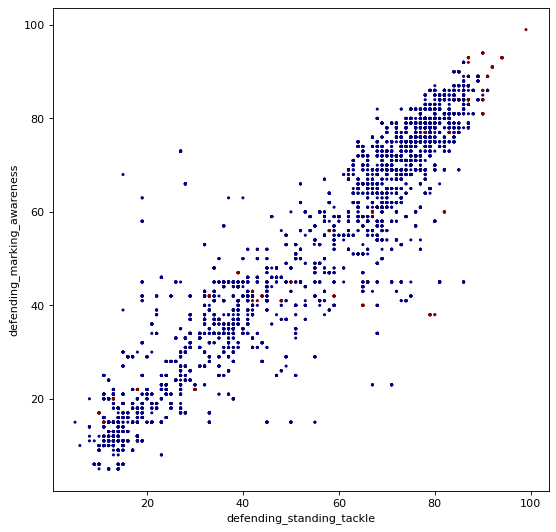

In [38]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['defending_marking_awareness'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('defending_marking_awareness')
plt.show()

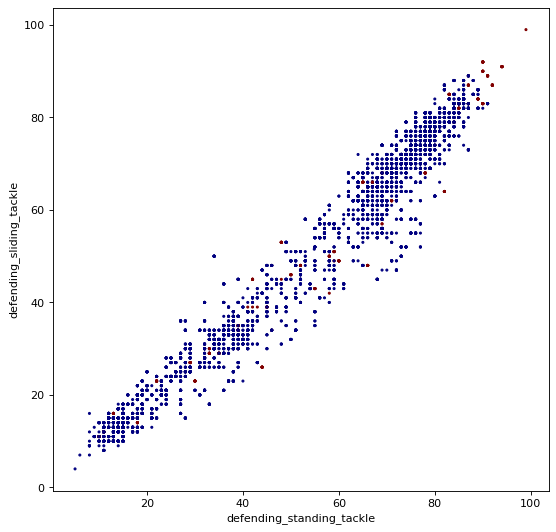

In [39]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['defending_sliding_tackle'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('defending_sliding_tackle')
plt.show()

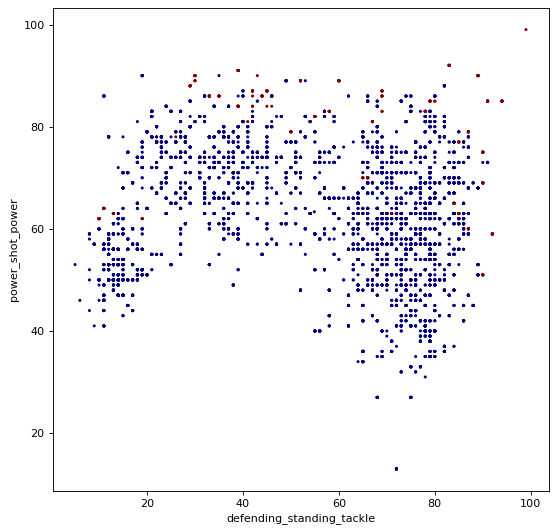

In [40]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['power_shot_power'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('power_shot_power')
plt.show()

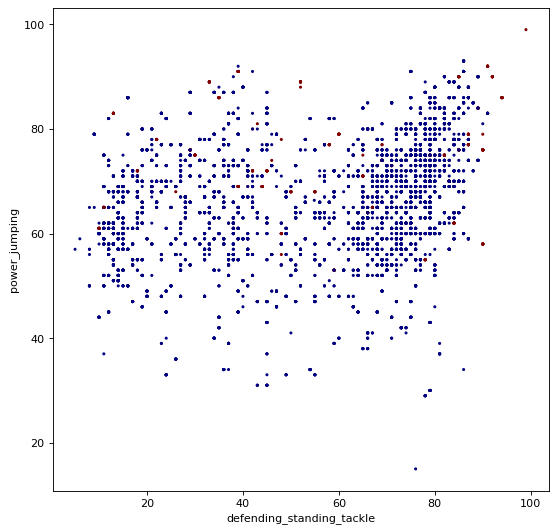

In [41]:
plt.figure(figsize=(8,8), dpi=80)
plt.scatter(df_skills['defending_standing_tackle'], y=df_skills['power_jumping'],s=3,c=bool_crack,cmap='jet')
plt.xlabel('defending_standing_tackle')
plt.ylabel('power_jumping')
plt.show()

In [21]:
#Elejimos dos variables, para esto elegimos dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[5]
skill_2=skills_ratings[15]

In [19]:
graf1 = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=df_n.loc[:,'club_name'], #'Height', 'Weight', 'Club', 'Age', 'long_name','Position'
                           marker=dict(
                                size=5)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Top players',
                      text=df_n.loc[bool_crack,'long_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[graf1,crack]

layout = go.Layout(title="Visualización de la base de a dos variables numéricas",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=650)

fig = go.Figure(data=data, layout=layout)

In [20]:
#En Colab
fig.show(renderer="colab")

In [32]:
plot(fig)

'temp-plot.html'